In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_csv("train.csv")
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

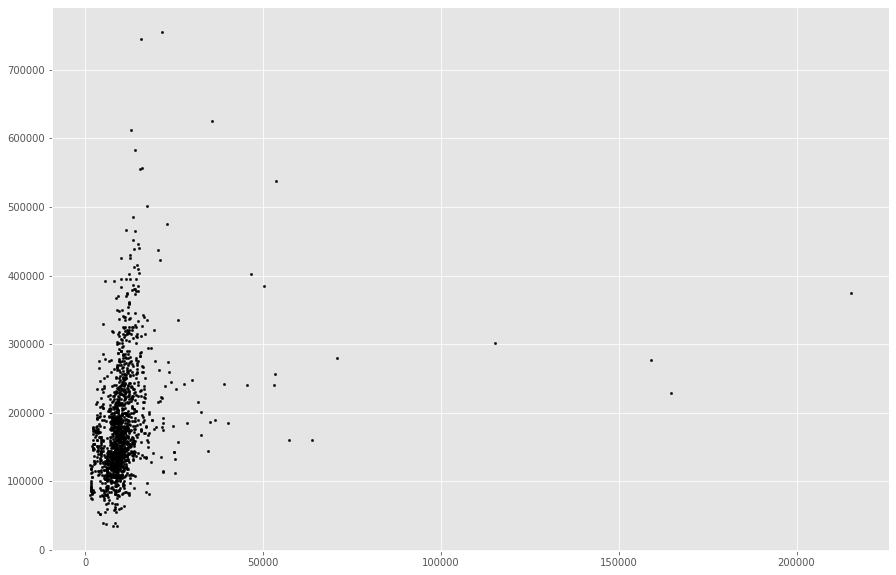

In [7]:
plt.figure(figsize=(15, 10))
style.use('ggplot')
plt.scatter(df.LotArea, df.SalePrice, s=5, c='k')

Text(0.5, 0, 'J')

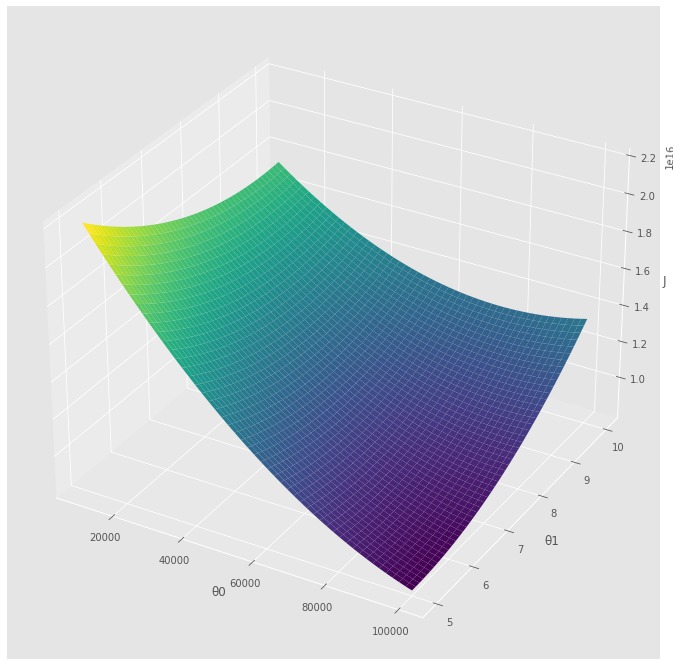

In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
m = len(df.LotArea)
theta_0 = np.linspace(10000, 100000, num = 1000)
theta_1 = np.linspace(5, 10, num = 1000)
Theta_0, Theta_1 = np.meshgrid(theta_0, theta_1)
def cost(theta_0, theta_1, LotArea, SalePrice):
    h = 0
    for i in range(len(LotArea)):
        h += (((theta_0 + (theta_1 * LotArea[i])) - SalePrice[i]) **            2)
    J = (1/2*len(LotArea)) * h
    return J
fig = plt.figure(figsize = (12,12))
style.use('ggplot')
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(Theta_0, Theta_1, cost(Theta_0, Theta_1, df.LotArea, df.SalePrice), cmap = 'viridis')
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J')

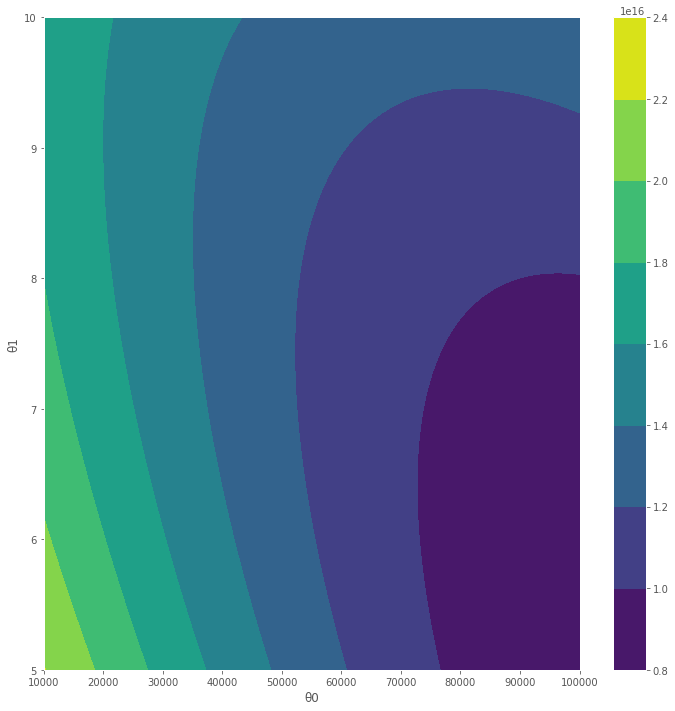

In [11]:
fig = plt.figure(figsize = (12,12))
style.use('ggplot')
ax = fig.add_subplot(111)
cs = ax.contourf(Theta_0, Theta_1, cost(Theta_0, Theta_1, df.LotArea, df.SalePrice))
cbar = fig.colorbar(cs)
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
plt.show()